In [150]:
!pip install scikit-learn

# 1- Importing Libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer,KNNImputer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import re
nltk.download("stopwords")
nltk.download("punkt_tab")
stem = PorterStemmer()
stopwords  = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# 2- Importing Dataset

In [152]:
df = pd.read_csv("/Users/prabhsandhu/Real-Estate-Investment-Recommender-System/Artifacts/Datasets/realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


# 3- Exploring Dataset

In [153]:
df.sample(5)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
448825,10262.0,for_sale,647247.0,3.0,3.0,0.15,1890439.0,Watersound,Florida,32461.0,1984.0,NaN
437502,85078.0,for_sale,750000.0,NaN,NaN,1.47,753334.0,Jacksonville,Florida,32254.0,NaN,2008-04-01
1983287,22611.0,sold,255000.0,4.0,3.0,0.13,1655793.0,Baytown,Texas,77523.0,2886.0,2021-11-12
1856232,936.0,sold,344900.0,2.0,2.0,NaN,1779322.0,Chicago,Illinois,60613.0,NaN,2022-04-21
2097041,90221.0,sold,1499000.0,2.0,2.0,0.24,722846.0,Coronado,California,92118.0,1650.0,2022-03-25


In [154]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [155]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [157]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [158]:
df.nunique()

brokered_by        110143
status                  3
price              102137
bed                    99
bath                   86
acre_lot            16057
street            2001358
city                20098
state                  55
zip_code            30334
house_size          12061
prev_sold_date      14954
dtype: int64

In [159]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

# 4- Preprocessing Data

# (A) - Handling and Managing Columns

In [160]:
df.drop(['brokered_by','street'],axis=1,inplace=True)
df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


# (B) - Checking/Imputing Null Values

In [161]:
df.isnull().sum()

status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [162]:
# Performing Simple Imputation

In [163]:
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,2:3]= imputer.fit_transform(df.iloc[:,2:3])


imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,3:4]= imputer.fit_transform(df.iloc[:,3:4])


imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
df.iloc[:,4:5]= imputer.fit_transform(df.iloc[:,4:5])

imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,-3:-2]= imputer.fit_transform(df.iloc[:,-3:-2])



In [164]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy="median")
df.iloc[:,-2:-1] = imputer1.fit_transform(df.iloc[:,-2:-1])

In [165]:
df["prev_sold_date"] = pd.to_datetime(df["prev_sold_date"],errors="coerce")
df["prev_sold_date"] = df["prev_sold_date"].interpolate()

In [166]:
df.dropna(inplace=True)

In [167]:
df.isnull().sum()

status            0
price             0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

# (C) - Checking/Handling Duplicate Values

In [168]:
df.duplicated().sum()

np.int64(6988)

In [169]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# (D) - Checking/Removing Outliers

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.show()

In [ ]:
df["price"]

411         76900.0
412         95000.0
413        245000.0
414         25000.0
415        289000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 2216030, dtype: float64

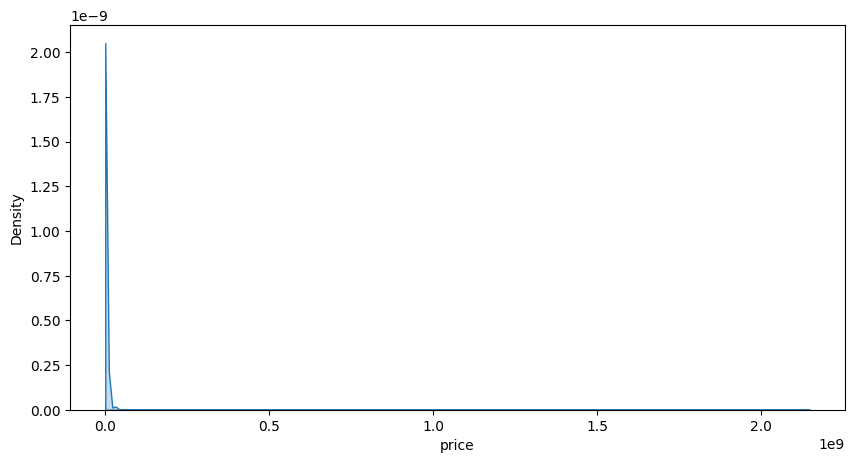

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df["price"], fill=True)
plt.show()


In [ ]:

# Removing/Capping Outliers using IQR

(np.float64(0.0), np.float64(2147483600.0))

In [ ]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1
iqr


upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(lower,upper)
df = df[df["price"]<upper]#171352

-410021.875 1126013.125


In [ ]:
q1 = df["house_size"].quantile(0.25)
q3 = df["house_size"].quantile(0.75)
iqr = q3-q1
iqr


upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(lower,upper)


492.5 2968.5


,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
438,for_sale,349900.0,6.0,5.0,0.27,Ponce,Puerto Rico,717.0,3953.0,2019-12-17 07:23:04.615384576
446,for_sale,250000.0,8.0,7.0,0.09,Ponce,Puerto Rico,730.0,4036.0,2019-11-25 18:27:41.538461440
504,for_sale,265000.0,6.0,3.0,4.94,Vega Alta,Puerto Rico,692.0,3000.0,2019-07-01 02:20:25.239005696
550,for_sale,319000.0,3.0,3.0,0.26,Hatillo,Puerto Rico,659.0,3227.0,2019-09-10 08:10:05.736137728
564,for_sale,367500.0,5.0,3.0,19.44,Lares,Puerto Rico,669.0,3907.0,2019-10-02 00:33:02.409177856
...,...,...,...,...,...,...,...,...,...,...
2226323,sold,839000.0,5.0,3.0,1.88,Walla Walla,Washington,99362.0,4188.0,2022-03-29 00:00:00.000000000
2226348,sold,249000.0,5.0,4.0,0.25,College Place,Washington,99324.0,3040.0,2022-01-28 00:00:00.000000000
2226377,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25 00:00:00.000000000
2226379,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24 00:00:00.000000000


In [ ]:
df["bed"].astype(int)
df["bath"].astype(int)
df["acre_lot"].astype(int)
df["zip_code"].astype(int)
df["house_size"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer